# Examples of common optimizations

## Memoization

See `examples_decorators.ipynb`

## Vectorization

In [7]:
import numpy as np
import timeit

def remove_greater_than(A,max_value):
    assert len(A.shape)==1
    new_A = []
    for a in A:
        if a<=max_value:
            new_A.append(a)
    return np.array(new_A)

def remove_greater_than_np(A,max_value):
    assert len(A.shape)==1
    return A[A<=max_value]

def test_both_remove_greater_than():
    A = np.random.rand(10)
    max_value=0.5
    print("without numpy:",remove_greater_than_np(A,max_value))
    print("with numpy:",remove_greater_than_np(A,max_value))

test_both_remove_greater_than()

without numpy: [0.48430796 0.10760683 0.36688592 0.41615144 0.16854206 0.29674081]
with numpy: [0.48430796 0.10760683 0.36688592 0.41615144 0.16854206 0.29674081]


In [8]:
print(np.zeros(3))

[0. 0. 0.]


1.151200000094832e-06
1.3944000002084067e-06
1.5985999998520128e-06
4.33819999852858e-06
2.2931199999220552e-05


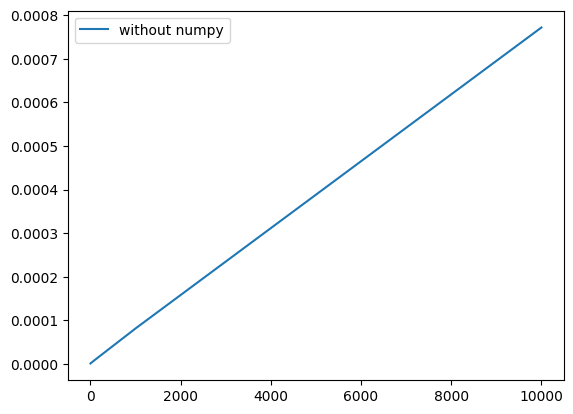

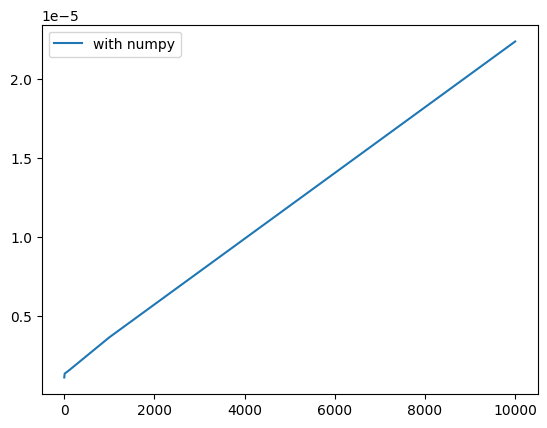

In [19]:
import matplotlib.pyplot as plt

max_value = 0.5
n_values = [1,10,1e2,1e3,1e4]
all_times_np = np.zeros(len(n_values))
all_times_without = np.zeros(len(n_values))
number_timeit = 1000

for i,n in enumerate(n_values):
    A = np.random.rand(int(n))
    print(timeit.timeit(lambda:remove_greater_than_np(A,max_value),number=number_timeit)/number_timeit)
    time_np = timeit.timeit(lambda:remove_greater_than_np(A,max_value),number=number_timeit)/number_timeit
    all_times_np[i]=time_np

    time_without = timeit.timeit(lambda:remove_greater_than(A,max_value),number=number_timeit)/number_timeit
    all_times_without[i]=time_without

plt.plot(n_values,all_times_without,label="without numpy")
plt.legend()
plt.show()

plt.plot(n_values,all_times_np,label="with numpy")
plt.legend()
plt.show()